In [1]:
data = catalog.load("ena-diario-parana")
data.head()

2021-12-08 12:34:55,101 - kedro.io.data_catalog - INFO - Loading data from `ena-diario-parana` (CSVDataSet)...


,nom_bacia,ena_bruta_bacia_mwmed,ena_bruta_bacia_percentualmlt,ena_armazenavel_bacia_mwmed,ena_armazenavel_bacia_percentualmlt
ena_data,,,,,
2000-01-01,PARANA,12073.358398,58.836899,12073.358398,58.836899
2000-01-02,PARANA,12579.799805,61.305000,12579.799805,61.305000
2000-01-03,PARANA,13393.181641,65.268799,13393.181641,65.268799
2000-01-04,PARANA,14473.228516,70.532204,14473.228516,70.532204
2000-01-05,PARANA,15750.317383,76.755798,15750.317383,76.755798


# Estatísticas básicas

In [2]:
data.describe()

,ena_bruta_bacia_mwmed,ena_bruta_bacia_percentualmlt,ena_armazenavel_bacia_mwmed,ena_armazenavel_bacia_percentualmlt
count,8011.000000,8011.000000,8011.000000,8011.000000
mean,16243.667103,109.707617,14477.458312,98.301099
std,7641.711622,36.133765,5887.913543,25.677907
min,4149.000000,18.320000,4621.824219,30.540001
25%,10528.000000,85.456001,10018.000000,81.405003
50%,14535.548828,104.519997,13526.000000,95.902100
75%,20406.500000,127.230003,17713.869141,112.895000
max,48903.000000,321.726105,40310.000000,235.066895


# Avaliando dados faltantes

In [18]:
import pandas as pd
dt_range = pd.date_range(start=min(data.index.date), end=max(data.index.date))

if len(dt_range) == len(data.index):
    print("Todas as datas entre {} e {} estão presentes.".format(str(min(data.index.date)), max(data.index.date)))

Todas as datas entre 2000-01-01 e 2021-12-06 estão presentes.


Na figura a seguire, linhas brancas horizontais representam dados faltantes. Linhas pretas, dados presentes. No caso, não há nenhum dado faltante no dataset.

/home/user01/.local/lib/python3.8/site-packages/missingno/missingno.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/home/user01/.local/lib/python3.8/site-packages/missingno/missingno.py:141: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot:>

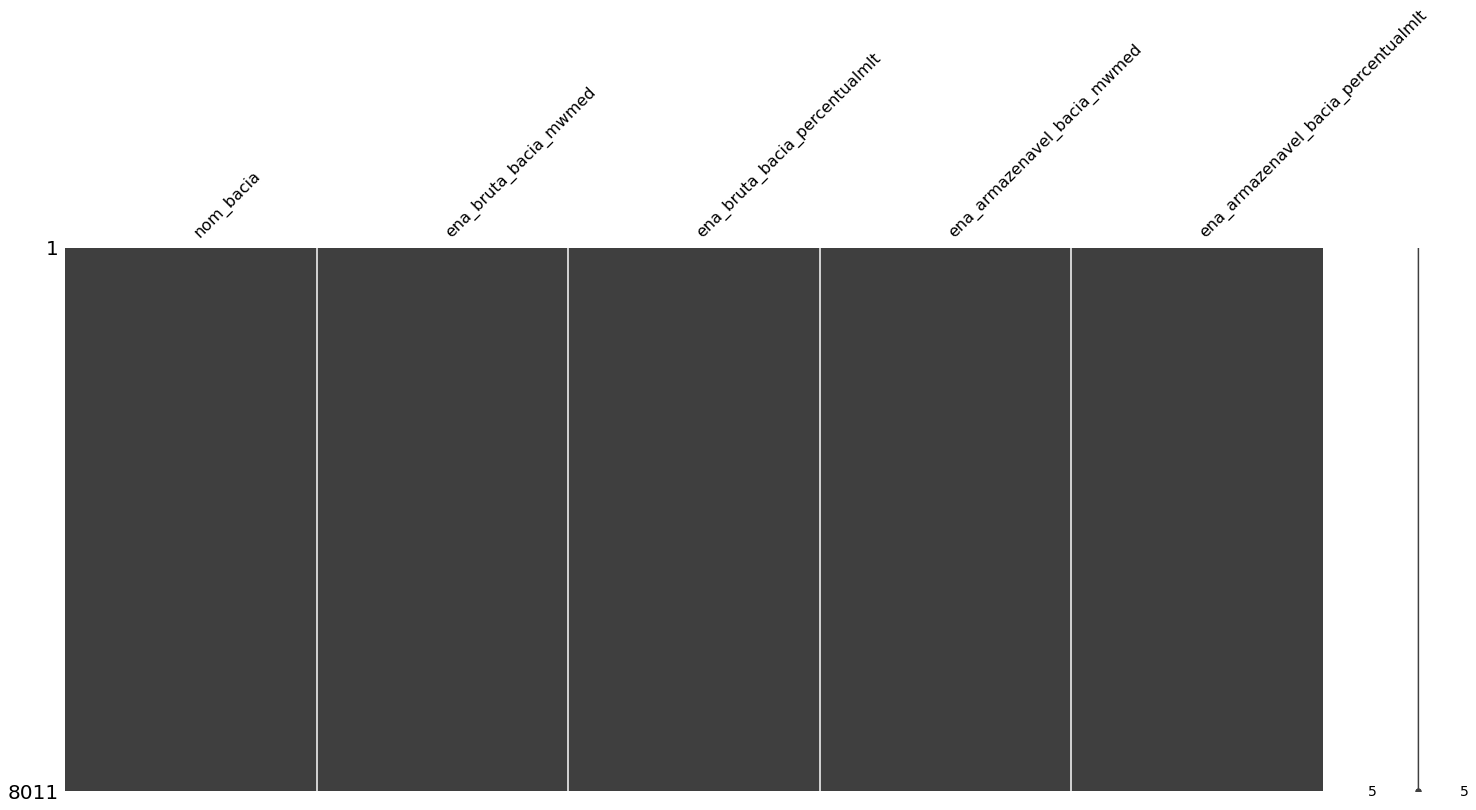

In [17]:
import missingno as msn

msn.matrix(data)

<AxesSubplot:xlabel='ena_data'>

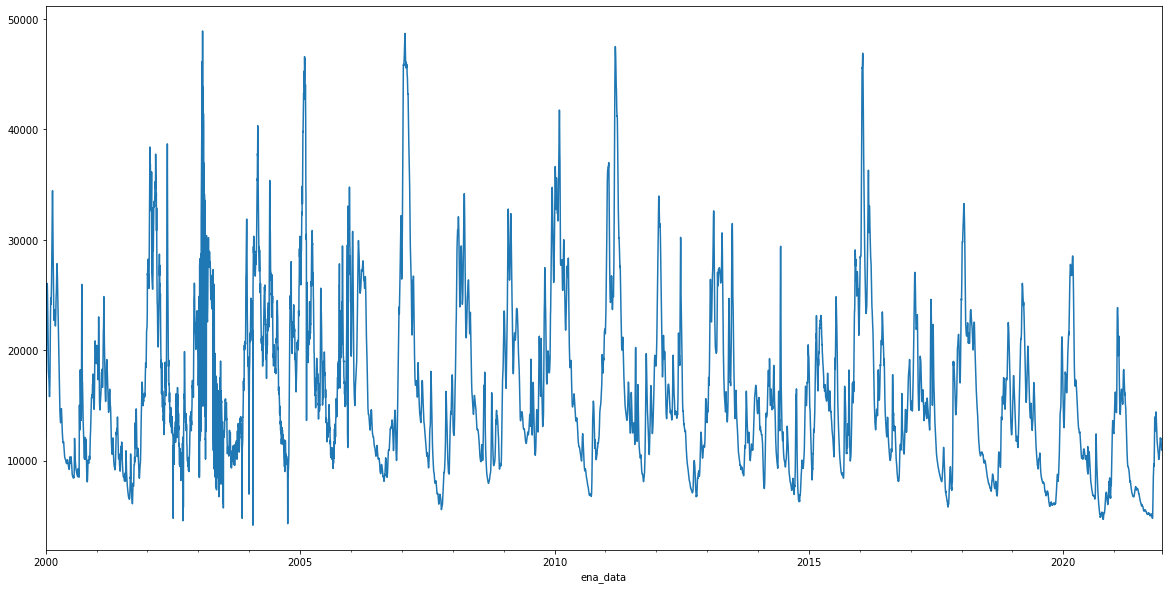

In [4]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)
data['ena_bruta_bacia_mwmed'].plot()

<AxesSubplot:xlabel='ena_data'>

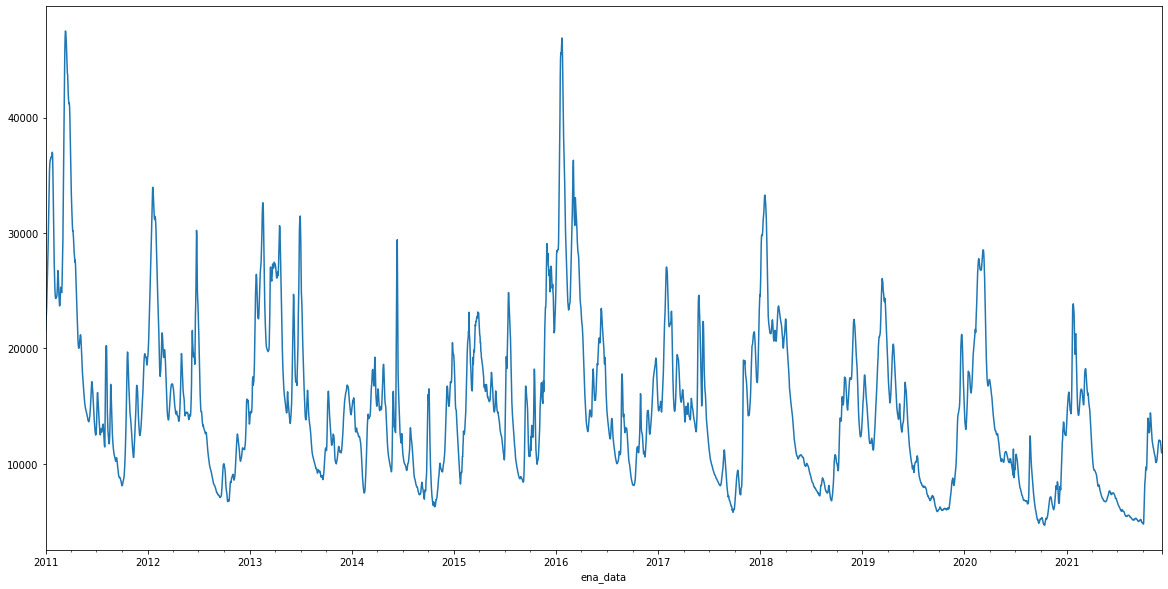

In [28]:
data[(data.index.year >= 2011)
    & (data.index.year <= 2021)]['ena_bruta_bacia_mwmed'].plot()